# Plan for today's class 
# 1. Embeddings for text data
<!-- # 2. Embeddings for network data -->
# 3. Embeddings for chat logs
<!-- # 4. Embeddings for images
# 5. Embeddings for audio
# 6. Embeddings for video
# 7. Embeddings for time series
# 8. Embeddings for tabular data
# 9. Embeddings for graphs
# 10. Embeddings for 3D data -->

# Plan for #1: Embeddings for text data
1. Get data from Zulip into CSV format
2. Create embeddings using code from last class.
3. Use the code from last class to create a visualization of the embeddings.

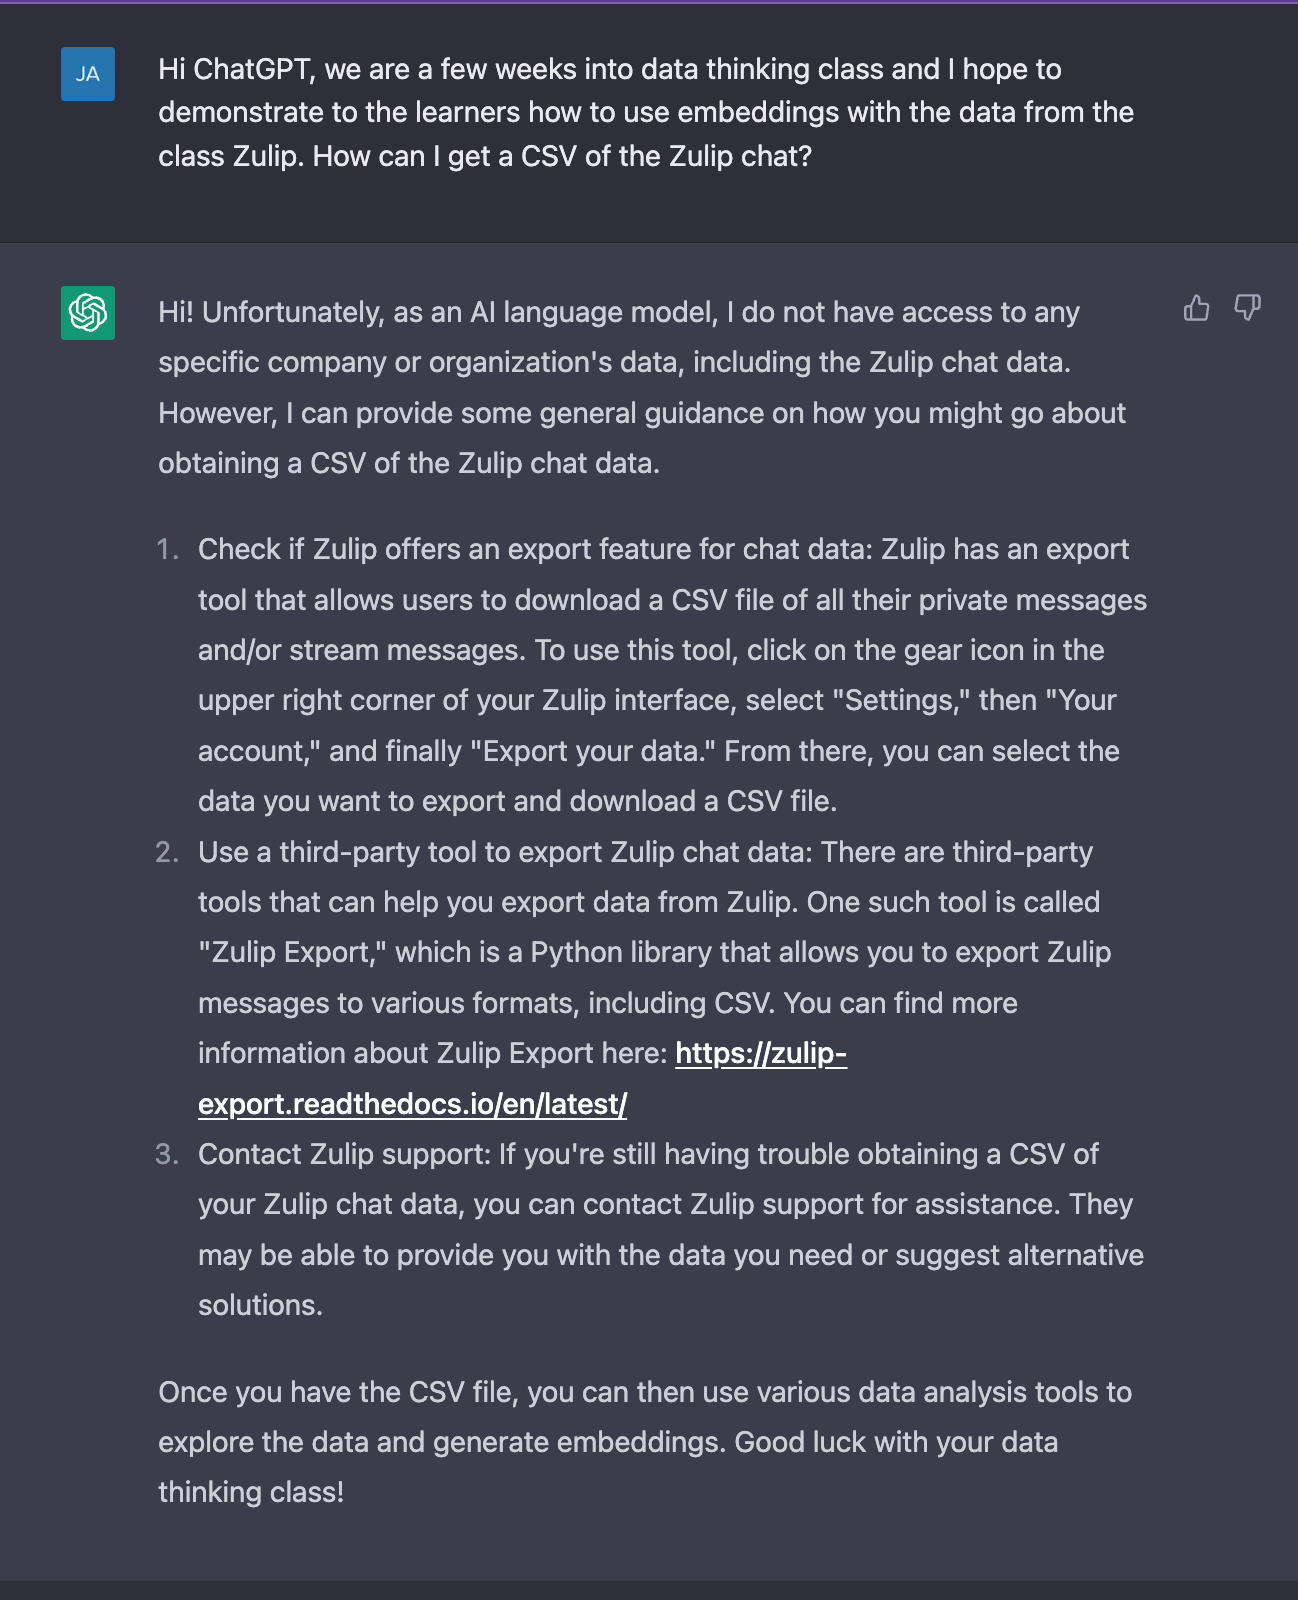

## 1. Get data from Zulip into CSV format

1. Follow https://zulip.com/help/export-your-organization
2. Click on settings
3. Click export data
4. download data to local laptop
5. Upload data to codespace
6. go to https://github.com/codespaces and click on menu
7. Push changes to new repository.

### Ethics of using Zulip data
* Students were informed that `By submitting this, you agree that your words will be allowed to be analyzed by current and future students of data thinking.` when they signed up for datathinking.zulipchat.com at https://courses.cs.ut.ee/2023/chatGPT/spring
* I'm not sure what 'public' versus not public means?
* VERY IMPORTANT to get informed consent from everyone if needed!
* The core issue around `informed consent` is that you need to tell people what you are going to do with their data, and they need to agree to it.
* Digital literacy: when people use a third-party service (external to the two parties such as a teacher and learners), people may be typically aware that their data may be used. I don't think this is obvious! 
* Opting out: if someone doesn't want their data to be used, they should be able to opt out. In this course -- they can opt out by not participating in the chat.
* Digital literacy: why might someone want to opt out?
  * Unknown consequences of data and powerful models trained on the entire internet.
  * Their data may be monetized by hosts of GPT-4, and other large language models that make money off of subscriptions. 
  * For example, would the professors involved here agree to their data/transcripts from YouTube being monetized by YouTube and Bing? https://twitter.com/thejaan/status/1635763034642690049?cxt=HHwWgsC9iYf0srMtAAAA
* Gulnara: if I use Google products, it's unavoidable that my data is used to make money. Social apps involve giving consent for data to be used. Privacy policies exist, but not many people read them and we give consent automatically. 
* Public speech: if you are in a public space, you are giving consent for your speech to be recorded and used.
* people may want to opt out in relation to how directly their data is linked to money that they do not receive. 
* "at this point, you kind of assume this is the price of free software"
* Stated intent, and behaviors associated with that intent matter. 
* For example, Jaan hopes that this data is directly used to benefit the open source course, tools for teachers around the world, and improves the learner experience for the 150+ people on the Data Thinking learner list. 
  * Actions related to this intent: 
    * 501(c)(3) non-profit organization, One Fact Foundation, is created to support the Data Thinking course and other open source projects.
    * Expert legal counsel, https://www.linkedin.com/in/stephen-winslow-5384167a/ and https://www.brombergerlaw.com/carly-leinheiser is consulted to ensure that the Data Thinking course is in compliance with all laws and regulations. 
    * Larger version of this course taught to faculty from 50+ historiaclly black colleges and universities in the United States.
    * https://2023.open-data.nyc/event/data-thinking-in-the-era-of-chatgpt/ is a public event that is open to the public.
    * Teaching larger version at University of Pennsylvania. 
    * NIH may hope to scale this type of approach to 10,000+ learners. 

## 2. Create embeddings using code from last class.

1. Load the json into a polars dataframe
2. Try visualizing the `search_tsvector` first
3. Try querying the polars dataframe for statistics

## To run the code below
`conda env create -f environment.yml` using the environment file.

In [1]:
# First, you'll need to install the Polars library if you haven't already. You can do this by running the following command in your Python environment:
!pip install polars


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 45.2 MB/s eta 0:00:0000:0100:01


> Next, you can load the JSON file into a Polars DataFrame using the from_json method. Here's an example code snippet that you can use:


In [3]:
import polars as pl

# Load the JSON file into a Polars DataFrame
df = pl.read_json("messages-000001.json")

# Print the first 10 rows of the DataFrame
print(df.head(10))


FileNotFoundError: No such file or directory: messages-000001.json

In [4]:
import polars as pl
df = pl.read_json("data/datathinking.zulipchat.com/raw/messages-000001.json")

RuntimeError: BindingsError: "Not yet implemented: read an Array from a non-Array JSON"

## Question! Can we convert the json into something else?

Yes!!! 

BUT: caveat is not being able to track the history of the data, starting with its procurement. 

In [ ]:
import polars as pl

# Load the JSON file into a Polars DataFrame
df = pl.read_json("messages-000001.json")

# Print the first 10 rows of the DataFrame
print(df.head(10))

## Do we really need to parse the data to convert it into another format? 
* Oh no! I hope no!!!!
* This is so much work!!!

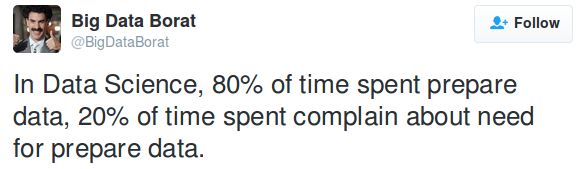

## Koan for class: think about whether what we are starting to see might have ANYTHING to do with ChatGPT exhibiting some of the issues we have already seen! What might be the connection?

## PLan: AVOID THIS AS LONG AS POSSIBLE!

In [11]:
df_pandas = pd.read_json("data/datathinking.zulipchat.com/raw/messages-000001.json", orient="records", lines=True)


ValueError: Expected object or value

In [7]:
import pandas as pd
import polars as pl

# Read the JSON file into a pandas DataFrame
df_pandas = pd.read_json("data/datathinking.zulipchat.com/raw/messages-000001.json", lines=True)

# Convert the pandas DataFrame to a Polars DataFrame
df = pl.from_pandas(df_pandas)

# Print the first 10 rows of the DataFrame
print(df.head(10))


ValueError: Expected object or value

In [12]:
import json

# Load the JSON file as a Python object
with open("data/datathinking.zulipchat.com/raw/messages-000001.json", "r") as f:
    data = [json.loads(line) for line in f]

# Inspect the first object in the list
print(data[0])


JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)

In [ ]:
import jax 
import jax.numpy as jnp

# Define embedding dimension
embedding_dim = 10

# Define vocabulary size
vocab_size = 16

# Define vocabulary
vocabulary = ["embedding", "dimension", "vocab", "size", "random", "matrix", 
              "jax", "numpy", "natural", "language", "processing", "represent", 
              "words", "phrases", "numerical", "vectors"]

# Create random embedding matrix
def random_embedding_matrix(vocab_size, embedding_dim):
    return jax.random.normal(jax.random.PRNGKey(0), (vocab_size, embedding_dim))

embedding_matrix = random_embedding_matrix(vocab_size, embedding_dim)

# Define the axis upon which embeddings are indexed on
embedding_axis_dim = 0 

# Get the embedding for "embedding"
embedding = embedding_matrix[vocabulary.index("embedding")]
print("Embedding for 'embedding':", embedding)